In [277]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import plotly_express as px


In [262]:
#reading csv file into pandas dataframe and naming df
df = pd.read_csv("/Users/beans/Desktop/Mod-4-Project/data/hour.csv")

#understanding values within df


df['dteday'] = pd.to_datetime(df['dteday'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [263]:
#making season column more legibile by associating numbers with season
#shown by readme when downloaded dataset
df['season'] = df['season'].replace(1,'winter')
df['season'] = df['season'].replace(2,'spring')
df['season'] = df['season'].replace(3,'summer')
df['season'] = df['season'].replace(4,'fall')


### VERY SIMPLE EDA for season and windspeeds column

df.groupby('season')['cnt'].sum()
#--we can see that winter has the least count for rides, and summer the most
#--INTEREST OF Product Manager (PM): When/where demand is strong or fragile (strong in summer, weak in winter); user behavior patterns; which hypotheses to prioritize next quarter.

df['season'].value_counts()
#--summer does have the highest counts of records (4496), with fall being the least (4232)
#--if data is responsbly distributed by season


#curious to see the average windspeed between winter and summer, maybe its the deciding factor
df.groupby('season')['windspeed'].mean()
#--average windspeeds of winter is comparable to spring, which has the second highest count for rides, maybe not such a big deal

#checking our normal windspeeds to see if a drastic diff between seasons (readme says windspeed column was divided by 67)
df['not_norm_windspeeds'] = df['windspeed'] * 67
df.groupby('season')['not_norm_windspeeds'].mean()
#--windspeeds change are so miniscule, would have to statistically prove if significant (potential chi-squared test)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              17379 non-null  int64         
 1   dteday               17379 non-null  datetime64[ns]
 2   season               17379 non-null  object        
 3   yr                   17379 non-null  int64         
 4   mnth                 17379 non-null  int64         
 5   hr                   17379 non-null  int64         
 6   holiday              17379 non-null  int64         
 7   weekday              17379 non-null  int64         
 8   workingday           17379 non-null  int64         
 9   weathersit           17379 non-null  int64         
 10  temp                 17379 non-null  float64       
 11  atemp                17379 non-null  float64       
 12  hum                  17379 non-null  float64       
 13  windspeed            17379 non-

# VERY ROUGH VISUALIZATIONS FOR EDA

<Axes: xlabel='season'>

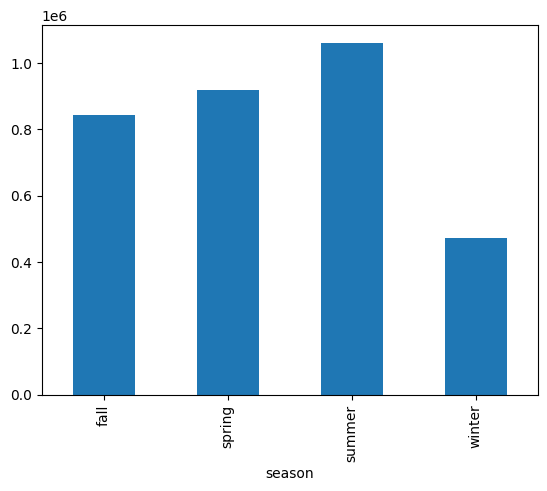

In [264]:
#visual for seasonality differences in bikeshare usage

df.groupby('season')['cnt'].sum().plot(kind='bar')


In [265]:
### QUICK EDA to find hour vs count (most frequent hours ppl use bikes)

#EDA to find the highest average of bike usage by hour
df.groupby('hr')['cnt'].mean().sort_values(ascending=False)
#--shows us 17,18, and 8 has highest,
#-- 5 hours above 300 count mean

hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt, dtype: float64

In [394]:
hourcount = df[['hr','cnt']]


# visual explaining count of users for bikeshare program by the hour,
# hourcount uses all data, i went into specific working days in the next codeblock to see if that is of interest


# we can see workindays are more frequent by double
# does it make sense to filter dataset to only workingday and assume the reason why its double is due to ppl who go to work? 
both = ['workingday','weekday']

df.groupby(both)['cnt'].sum()

workingday  weekday
0           0          444027
            1           59605
            2            1013
            3            7403
            4            3920
            5            6494
            6          477807
1           1          395898
            2          468096
            3          465645
            4          481475
            5          481296
Name: cnt, dtype: int64

In [405]:
#complete workingday indexes (not weekends & not holidays)

workingdays = df[df['workingday'] == 1]
#steeper curves and higher means if we just focus on working days
linegraph = workingdays.groupby('hr')['cnt'].mean().reset_index()
windspeedsmean = workingdays.groupby('hr')['not_norm_windspeeds'].mean().reset_index()

fulldata = pd.merge(linegraph,windspeedsmean,on='hr')
# BEST SUITED FOR OPERATIONS TEAM, GIVES US TIMES WHEN LEAST LIKELY FOR BIKE RIDES AND CAN DO MAINTENENCE

print(fulldata['cnt'].mean())

lines = px.line(fulldata,x='hr',y='cnt',title='Count of Average Riders per Hour',width=650,height=500)
lines.update_layout(xaxis_title='Hour',yaxis_title='Average Count of Riders',font=dict(size=12))



192.03508579612011


In [ ]:
timebin=[]
for i in range (len(fulldata)):
    count = fulldata.iloc[i]['cnt']
    if count >= 275:
        timebin.append('Peak Hours')
    elif 100 < count < 275:
        timebin.append('Not Peak')
    elif count < 100:
        timebin.append('Maintenance')
fulldata['timebin'] = timebin

fulldata
#during peak hours seems pretty okay for windspeeds

,hr,cnt,not_norm_windspeeds,timebin
0,0,36.786290,10.683785,Maintenance
1,1,16.552632,10.378924,Maintenance
2,2,8.683778,10.178965,Maintenance
3,3,4.942553,10.117456,Maintenance
4,4,5.429787,10.387609,Maintenance
5,5,24.913131,10.087290,Maintenance
6,6,102.500000,10.552878,Not Peak
7,7,290.612903,11.016394,Peak Hours
8,8,477.006048,11.804752,Peak Hours
9,9,241.518145,12.982155,Not Peak


In [418]:
#tabular format for workingdays based on each day
#workingdays.groupby('dteday').agg({'cnt':['min','max','mean'],'temp':['mean'],'hum':['mean'],'not_norm_windspeeds':['max','mean']})


#workingdays['not_norm_windspeeds'].mean()
#--potential opportunity to provide safety enhancements for windspeeds far above the mean (like 10 more)


#SHOWS SPREAD OF WINDSPEED, many values above 20, mean is 12 (a lot of values of 0)
#workingdays['not_norm_windspeeds'].plot(kind='hist')

#workingdays['z_score_windspeed'] = stats.zscore(workingdays['not_norm_windspeeds'])
#workingdays.plot(kind='hist',x='z_score_windspeed',y='cnt')

#sns.kdeplot(workingdays['windspeed'])

#workingdays['windspeed'].sample(100).plot(kind='kde')

#SHOWS SPREAD OF WINDSPEED, many values above 20, mean is 12 (a lot of values of 0)
workingdensity = workingdays.groupby('dteday').agg({'cnt':'mean','not_norm_windspeeds':'mean'}).reset_index()

density = px.histogram(workingdensity,'not_norm_windspeeds','cnt',title='Count of Rides by Windspeed',nbins=24,height=500,width=600)
density.update_layout(xaxis_title='Average Windspeed During Day',yaxis_title='Average Count of Riders',font=dict(size=12))



In [445]:
timebin=[]
for i in range (len(workingdensity)):
    count = workingdensity.iloc[i]['cnt']
    #270 is above the 80th quantile
    if count >= 270:
        timebin.append('Peak Day')
    elif 100 < count < 270:
        timebin.append('Not Peak')
    elif count < 100:
        timebin.append('Maintenance')
workingdensity['timebin'] = timebin


In [ ]:
peak = workingdensity[workingdensity['timebin'] == 'Peak Day']

peakgram = px.histogram(peak,'not_norm_windspeeds','cnt',title='Count of Rides by Windspeed During Peak Days',nbins=24,height=500,width=600)
peakgram.update_layout(xaxis_title='Average Windspeed',yaxis_title='Average Count of Riders',font=dict(size=12))


In [299]:
workingbar = workingdays.groupby('season')['cnt'].sum().reset_index()

#SEASONALITY FOR WORKINGDAYS GOOD FOR PM
seasonality = px.bar(workingbar,'season','cnt',text='cnt',title='Count of Total Rides by Season',width=450,height = 500)
seasonality.update_layout(xaxis_title='Season', yaxis_title='Total Count of Rides', font=dict(size=12))
seasonality.update_traces(marker_color = ['RoyalBlue', 'RoyalBlue', 'ForestGreen', 'FireBrick'],textposition='outside')



In [442]:
#a lot more registered users than casual, same goes for original dataframe
workingdays[['registered','casual']].sum()

print('total count sum',workingdays['cnt'].sum())
print('total casual sum',workingdays['casual'].sum())
print('total registered sum',workingdays['registered'].sum())
#--unsure to use if to not potentially bias registered users


piedata = workingdays[['casual','registered']].sum().reset_index
workingpie = px.pie(workingdays,values=workingdays[['casual','registered']].sum(),names=['casual','registered'],title='Percentage of Casual vs Registered',height=400, width=500)
workingpie.update_layout(font=dict(size=15))

#workingdays.groupby('weekday').agg('ocasual')
#--thursday on average have the highest usage for bike share but not by much

#workingdays.groupby('season')['casual'].sum()


total count sum 2292410
total casual sum 303285
total registered sum 1989125
